In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import json
import re

# FotMob

In [3]:
url = 'https://www.fotmob.com/matches/marseille-vs-brighton/2x6hvy#4315104'
page = requests.get(url)

In [4]:
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.text,'html.parser')

In [6]:
scripts = soup.find_all('script')

In [7]:
scripts

[<script type="application/ld+json">{"@context":"https://schema.org","@type":"FAQPage","mainEntity":[{"@type":"Question","name":"Who won between Brighton & Hove Albion and Marseille on Thu, 14 Dec 2023 20:00:00 GMT?","acceptedAnswer":{"@type":"Answer","text":"Brighton & Hove Albion won 1–0 over Marseille on Thu, 14 Dec 2023 20:00:00 GMT."}}]}</script>,
 <script type="application/ld+json">{"@context":"https://schema.org","@type":"SportsEvent","sport":"Football/Soccer","homeTeam":{"@context":"https://schema.org","@type":"SportsTeam","name":"Brighton & Hove Albion","sport":"Football/Soccer","logo":"https://images.fotmob.com/image_resources/logo/teamlogo/10204.png","url":"https://www.fotmob.com/teams/10204/overview/brighton-hove-albion","location":null,"memberOf":null},"awayTeam":{"@context":"https://schema.org","@type":"SportsTeam","name":"Marseille","sport":"Football/Soccer","logo":"https://images.fotmob.com/image_resources/logo/teamlogo/8592.png","url":"https://www.fotmob.com/teams/8592

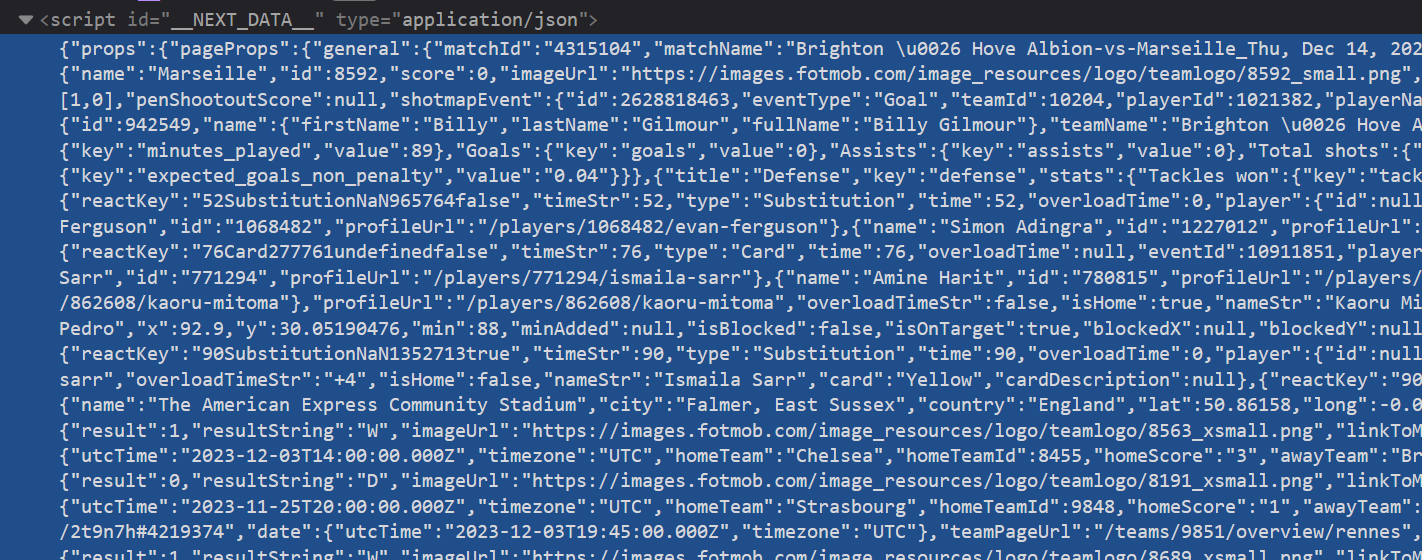

In [8]:
#this is the the specific string from the "scripts" HMTL that contains the JSON data
#scripts[103]

In [9]:
strings = scripts[103].string
#strings

In [10]:
#splitting to only select the relevant match data ("strings" includes more stuff we don't want...)
before, sep, after = strings.partition(',"seo"')

In [11]:
#before

In [12]:
def check_json_brackets(json_string):
    square_brackets = 0  # For []
    curly_brackets = 0   # For {}

    for char in json_string:
        if char == '[':
            square_brackets += 1
        elif char == ']':
            square_brackets -= 1
        elif char == '{':
            curly_brackets += 1
        elif char == '}':
            curly_brackets -= 1

    return square_brackets, curly_brackets

# Replace with your actual JSON string
json_string = before
square, curly = check_json_brackets(json_string)

print("Mismatch in square brackets: ", square)
print("Mismatch in curly brackets: ", curly)

Mismatch in square brackets:  0
Mismatch in curly brackets:  3


In [13]:
#correcting the JSON string in order to be able to parse it
before = before.replace(r'{"props":{"pageProps":','')
before = before + '}'

In [14]:
data = json.loads(before)

In [15]:
df = pd.json_normalize(data)

In [16]:
df

,nav,ongoing,hasPendingVAR,general.matchId,general.matchName,general.matchRound,general.teamColors.darkMode.home,general.teamColors.darkMode.away,general.teamColors.lightMode.home,general.teamColors.lightMode.away,...,content.table.url,content.table.teams,content.table.tournamentNameForUrl,content.table.parentLeagueId,content.table.countryCode,content.h2h.summary,content.h2h.matches,content.momentum.main.data,content.momentum.main.debugTitle,content.momentum.alternateModels
0,"[matchfacts, liveticker, lineup, stats, table,...",False,False,4315104,"Brighton & Hove Albion-vs-Marseille_Thu, Dec 1...",6,#095bb6,#ffffff,#0850A0,#242736,...,https://data.fotmob.com/tables.ext.887389.fot.gz,"[10204, 8592]",Europa League Grp. B,73,INT-2,"[0, 1, 0]",[{'time': {'utcTime': '2023-10-05T16:45:00.000...,"[{'minute': 0, 'value': 0}, {'minute': 1, 'val...",Using xT SA-version,[]


In [17]:
data.keys()

dict_keys(['general', 'header', 'nav', 'ongoing', 'hasPendingVAR', 'content'])

In [18]:
data.values()

dict_values([{'matchId': '4315104', 'matchName': 'Brighton & Hove Albion-vs-Marseille_Thu, Dec 14, 2023, 20:00 UTC', 'matchRound': '6', 'teamColors': {'darkMode': {'home': '#095bb6', 'away': '#ffffff'}, 'lightMode': {'home': '#0850A0', 'away': '#242736'}, 'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)', 'away': 'rgba(29, 29, 29, 1.0)'}, 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)', 'away': 'rgba(255, 255, 255, 1.0)'}}, 'leagueId': 887389, 'leagueName': 'Europa League Grp. B', 'leagueRoundName': 'Round 6', 'parentLeagueId': 73, 'countryCode': 'INT-2', 'homeTeam': {'name': 'Brighton & Hove Albion', 'id': 10204}, 'awayTeam': {'name': 'Marseille', 'id': 8592}, 'coverageLevel': 'xG', 'matchTimeUTC': 'Thu, Dec 14, 2023, 20:00 UTC', 'matchTimeUTCDate': '2023-12-14T20:00:00.000Z', 'started': True, 'finished': True}, {'teams': [{'name': 'Brighton & Hove Albion', 'id': 10204, 'score': 1, 'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/10204_small.png', 'pageUrl':

In [19]:
data

{'general': {'matchId': '4315104',
  'matchName': 'Brighton & Hove Albion-vs-Marseille_Thu, Dec 14, 2023, 20:00 UTC',
  'matchRound': '6',
  'teamColors': {'darkMode': {'home': '#095bb6', 'away': '#ffffff'},
   'lightMode': {'home': '#0850A0', 'away': '#242736'},
   'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(29, 29, 29, 1.0)'},
   'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(255, 255, 255, 1.0)'}},
  'leagueId': 887389,
  'leagueName': 'Europa League Grp. B',
  'leagueRoundName': 'Round 6',
  'parentLeagueId': 73,
  'countryCode': 'INT-2',
  'homeTeam': {'name': 'Brighton & Hove Albion', 'id': 10204},
  'awayTeam': {'name': 'Marseille', 'id': 8592},
  'coverageLevel': 'xG',
  'matchTimeUTC': 'Thu, Dec 14, 2023, 20:00 UTC',
  'matchTimeUTCDate': '2023-12-14T20:00:00.000Z',
  'started': True,
  'finished': True},
 'header': {'teams': [{'name': 'Brighton & Hove Albion',
    'id': 10204,
    'score': 1,
    'imageUrl': 'https://images.

**Lineups**

In [20]:
data['content']['lineup']

{'lineup': [{'teamId': 10204,
   'teamName': 'Brighton & Hove Albion',
   'bench': [{'id': '1068482',
     'positionId': 0,
     'position': 'Substitute',
     'localizedPosition': None,
     'name': {'firstName': 'Evan',
      'lastName': 'Ferguson',
      'fullName': 'Evan Ferguson'},
     'shirt': 28,
     'usualPosition': 3,
     'usingOptaId': False,
     'teamId': '10204',
     'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
     'pageUrl': '/players/1068482/evan-ferguson',
     'isHomeTeam': True,
     'timeSubbedOn': 64,
     'timeSubbedOff': None,
     'positionRow': 0,
     'role': 'Attacker',
     'events': {'sub': {'subbedIn': 64}},
     'rating': {'num': '6.1',
      'bgcolor': '#f08022',
      'isTop': {'isTopRating': False, 'isMatchFinished': True}},
     'fantasyScore': {'num': None, 'bgcolor': 'purple'},
     'minutesPlayed': 26,
     'shotmap': [{'id': 2628817501,
       'eventType': 'Miss',
       'teamId': 10204,
       'playerId': 

In [21]:
data['content']['lineup']['lineup'][0]

{'teamId': 10204,
 'teamName': 'Brighton & Hove Albion',
 'bench': [{'id': '1068482',
   'positionId': 0,
   'position': 'Substitute',
   'localizedPosition': None,
   'name': {'firstName': 'Evan',
    'lastName': 'Ferguson',
    'fullName': 'Evan Ferguson'},
   'shirt': 28,
   'usualPosition': 3,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
   'pageUrl': '/players/1068482/evan-ferguson',
   'isHomeTeam': True,
   'timeSubbedOn': 64,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Attacker',
   'events': {'sub': {'subbedIn': 64}},
   'rating': {'num': '6.1',
    'bgcolor': '#f08022',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 26,
   'shotmap': [{'id': 2628817501,
     'eventType': 'Miss',
     'teamId': 10204,
     'playerId': 1068482,
     'playerName': 'Evan Ferguson',
     'x': 86.5676470584,


In [22]:
data['content']['lineup']['lineup'][1]

{'teamId': 8592,
 'teamName': 'Marseille',
 'bench': [{'id': '965764',
   'positionId': 0,
   'position': 'Substitute',
   'localizedPosition': None,
   'name': {'firstName': 'Iliman',
    'lastName': 'Ndiaye',
    'fullName': 'Iliman Ndiaye'},
   'shirt': 29,
   'usualPosition': 3,
   'usingOptaId': False,
   'teamId': '8592',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/965764.png',
   'pageUrl': '/players/965764/iliman-ndiaye',
   'isHomeTeam': False,
   'timeSubbedOn': 52,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Attacker',
   'events': {'sub': {'subbedIn': 52}},
   'rating': {'num': '6.6',
    'bgcolor': '#f08022',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 38,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 6.55},
      'Minutes played': {'key': 'mi

In [23]:
data['content']['lineup']['lineup'][0]['players']

[[{'id': '107917',
   'positionId': 11,
   'position': 'Keeper',
   'positionStringShort': 'GK',
   'localizedPosition': {'label': 'GK', 'key': 'keeper'},
   'name': {'firstName': 'Jason',
    'lastName': 'Steele',
    'fullName': 'Jason Steele'},
   'shirt': 23,
   'usualPosition': 0,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
   'pageUrl': '/players/107917/jason-steele',
   'isHomeTeam': True,
   'timeSubbedOn': None,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Keeper',
   'events': {'yc': 1},
   'rating': {'num': '7.1',
    'bgcolor': '#1ec853',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 90,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
      'Minutes played': {'key': 'minutes_played',

In [24]:
data['content']['lineup']['lineup'][0]['lineup']

'4 - 2 - 3 - 1'

In [25]:
data['content']['lineup']['lineup'][0]['optaLineup']['bench']

[{'id': '1068482',
  'positionId': 0,
  'position': 'Substitute',
  'localizedPosition': None,
  'name': {'firstName': 'Evan',
   'lastName': 'Ferguson',
   'fullName': 'Evan Ferguson'},
  'shirt': 28,
  'usualPosition': 3,
  'usingOptaId': False,
  'teamId': '10204',
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
  'pageUrl': '/players/1068482/evan-ferguson',
  'isHomeTeam': False,
  'timeSubbedOn': 64,
  'timeSubbedOff': None,
  'positionRow': 0,
  'role': 'Attacker',
  'events': {'sub': {'subbedIn': 64}},
  'rating': {'num': '6.1',
   'bgcolor': '#f08022',
   'isTop': {'isTopRating': False, 'isMatchFinished': True}},
  'fantasyScore': {'num': None, 'bgcolor': 'purple'},
  'minutesPlayed': 26,
  'shotmap': [{'id': 2628817501,
    'eventType': 'Miss',
    'teamId': 10204,
    'playerId': 1068482,
    'playerName': 'Evan Ferguson',
    'x': 86.5676470584,
    'y': 24.5597452279,
    'min': 86,
    'minAdded': None,
    'isBlocked': False,
    'isOnT

In [26]:
data['content']['lineup']['lineup'][0]['optaLineup']['coach']

[{'id': '42044',
  'name': {'firstName': 'Roberto',
   'lastName': 'De Zerbi',
   'fullName': 'Roberto De Zerbi'},
  'usualPosition': 5,
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/42044.png',
  'pageUrl': '/players/42044/roberto-de-zerbi',
  'isHomeTeam': False,
  'timeSubbedOn': None,
  'timeSubbedOff': None,
  'positionRow': None,
  'role': 'Coach',
  'isCaptain': False,
  'events': {}}]

In [27]:
data['content']['lineup']['lineup'][0]['optaLineup']['players']

[[{'id': '107917',
   'positionId': 11,
   'position': 'Keeper',
   'positionStringShort': 'GK',
   'localizedPosition': {'label': 'GK', 'key': 'keeper'},
   'name': {'firstName': 'Jason',
    'lastName': 'Steele',
    'fullName': 'Jason Steele'},
   'shirt': 23,
   'usualPosition': 0,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
   'pageUrl': '/players/107917/jason-steele',
   'isHomeTeam': False,
   'timeSubbedOn': None,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Keeper',
   'events': {'yc': 1},
   'rating': {'num': '7.1',
    'bgcolor': '#1ec853',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 90,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
      'Minutes played': {'key': 'minutes_played'

**Player profiles**

In [28]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][0]

[{'id': '107917',
  'positionId': 11,
  'position': 'Keeper',
  'positionStringShort': 'GK',
  'localizedPosition': {'label': 'GK', 'key': 'keeper'},
  'name': {'firstName': 'Jason',
   'lastName': 'Steele',
   'fullName': 'Jason Steele'},
  'shirt': 23,
  'usualPosition': 0,
  'usingOptaId': False,
  'teamId': '10204',
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
  'pageUrl': '/players/107917/jason-steele',
  'isHomeTeam': False,
  'timeSubbedOn': None,
  'timeSubbedOff': None,
  'positionRow': 0,
  'role': 'Keeper',
  'events': {'yc': 1},
  'rating': {'num': '7.1',
   'bgcolor': '#1ec853',
   'isTop': {'isTopRating': False, 'isMatchFinished': True}},
  'fantasyScore': {'num': None, 'bgcolor': 'purple'},
  'minutesPlayed': 90,
  'shotmap': [],
  'stats': [{'title': 'Top stats',
    'key': 'top_stats',
    'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
     'Minutes played': {'key': 'minutes_played', 'value': 90},
     'Saves': 

In [29]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][1][3]

{'id': '768331',
 'positionId': 38,
 'position': 'Defender',
 'positionStringShort': 'LB',
 'localizedPosition': {'label': 'LB', 'key': 'leftback_short'},
 'name': {'firstName': '', 'lastName': 'Igor', 'fullName': 'Igor'},
 'shirt': 3,
 'usualPosition': 1,
 'usingOptaId': False,
 'teamId': '10204',
 'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/768331.png',
 'pageUrl': '/players/768331/igor',
 'isHomeTeam': False,
 'timeSubbedOn': None,
 'timeSubbedOff': None,
 'positionRow': 1,
 'role': 'Defender',
 'events': {},
 'rating': {'num': '7.5',
  'bgcolor': '#1ec853',
  'isTop': {'isTopRating': False, 'isMatchFinished': True}},
 'fantasyScore': {'num': None, 'bgcolor': 'purple'},
 'minutesPlayed': 90,
 'shotmap': [],
 'stats': [{'title': 'Top stats',
   'key': 'top_stats',
   'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.46},
    'Minutes played': {'key': 'minutes_played', 'value': 90},
    'Goals': {'key': 'goals', 'value': 0},
    'Assists': {'key': '

In [30]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['shotmap']

[{'id': 2628760769,
  'eventType': 'AttemptSaved',
  'teamId': 10204,
  'playerId': 1227012,
  'playerName': 'Simon Adingra',
  'x': 85.70882352880001,
  'y': 19.7954140155,
  'min': 7,
  'minAdded': None,
  'isBlocked': False,
  'isOnTarget': True,
  'blockedX': 102.53448275880001,
  'blockedY': 32.3225,
  'goalCrossedY': 33.77125,
  'goalCrossedZ': 0.28252631440000003,
  'expectedGoals': 0.0248645581305027,
  'expectedGoalsOnTarget': 0.0225,
  'shotType': 'LeftFoot',
  'situation': 'RegularPlay',
  'period': 'FirstHalf',
  'isOwnGoal': False,
  'onGoalShot': {'x': 1.0605158730158726,
   'y': 0.07474241121693122,
   'zoomRatio': 1},
  'isSavedOffLine': False,
  'teamColor': '#0850A0'},
 {'id': 2628771325,
  'eventType': 'AttemptSaved',
  'teamId': 10204,
  'playerId': 1227012,
  'playerName': 'Simon Adingra',
  'x': 90.8,
  'y': 20.9864968186,
  'min': 23,
  'minAdded': None,
  'isBlocked': True,
  'isOnTarget': True,
  'blockedX': 93.1,
  'blockedY': 22.177579621699998,
  'goalCrosse

In [31]:
adingra_shots = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['shotmap']
adingra_shots = pd.json_normalize(adingra_shots)
adingra_shots.rename(columns = {'eventType':'Type','isBlocked':'Blocked','isOnTarget':'On Target',
                               'expectedGoals':'xG','expectedGoalsOnTarget':'xGOT'},inplace = True)
adingra_shots.loc[:,['Type','playerName','x','y','min',
                    'Blocked','On Target','xG','xGOT',
                    'shotType','situation','blockedX','blockedY',
                    'goalCrossedY','goalCrossedZ','isSavedOffLine']]

,Type,playerName,x,y,min,Blocked,On Target,xG,xGOT,shotType,situation,blockedX,blockedY,goalCrossedY,goalCrossedZ,isSavedOffLine
0,AttemptSaved,Simon Adingra,85.708824,19.795414,7,False,True,0.024865,0.0225,LeftFoot,RegularPlay,102.534483,32.32250,33.771250,0.282526,False
1,AttemptSaved,Simon Adingra,90.800000,20.986497,23,True,True,0.022812,NaN,LeftFoot,RegularPlay,93.100000,22.17758,35.677500,1.220000,False
2,Miss,Simon Adingra,85.601471,39.124762,57,False,False,0.074018,NaN,RightFoot,RegularPlay,NaN,NaN,33.313750,4.828000,False
3,Miss,Simon Adingra,94.289474,24.209427,58,False,False,0.088350,NaN,RightFoot,RegularPlay,NaN,NaN,27.950714,4.940966,False


In [32]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats']

[{'title': 'Top stats',
  'key': 'top_stats',
  'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.47},
   'Minutes played': {'key': 'minutes_played', 'value': 64},
   'Goals': {'key': 'goals', 'value': 0},
   'Assists': {'key': 'assists', 'value': 0},
   'Total shots': {'key': 'total_shots', 'value': 4},
   'Shotmap': {'key': None, 'value': True},
   'Accurate passes': {'key': 'accurate_passes', 'value': '18/23 (78%)'},
   'Chances created': {'key': 'chances_created', 'value': 2},
   'Expected goals (xG)': {'key': 'expected_goals', 'value': '0.21'},
   'Expected goals on target (xGOT)': {'key': 'expected_goals_on_target_variant',
    'value': '0.02'},
   'Expected assists (xA)': {'key': 'expected_assists', 'value': '0.17'},
   'xG + xA': {'key': 'xg_and_xa', 'value': '0.38'}}},
 {'title': 'Attack',
  'key': 'attack',
  'stats': {'Shot accuracy': {'key': 'shot_accuracy', 'value': '1/3 (33%)'},
   'Blocked shots': {'key': 'blocked_shots', 'value': 1},
   'Touches': {'key': 't

In [33]:
adingra_top_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][0]
adingra_top_df = pd.json_normalize(adingra_top_stats)
adingra_top_df

,title,key,stats.FotMob rating.key,stats.FotMob rating.value,stats.Minutes played.key,stats.Minutes played.value,stats.Goals.key,stats.Goals.value,stats.Assists.key,stats.Assists.value,...,stats.Chances created.key,stats.Chances created.value,stats.Expected goals (xG).key,stats.Expected goals (xG).value,stats.Expected goals on target (xGOT).key,stats.Expected goals on target (xGOT).value,stats.Expected assists (xA).key,stats.Expected assists (xA).value,stats.xG + xA.key,stats.xG + xA.value
0,Top stats,top_stats,rating_title,7.47,minutes_played,64,goals,0,assists,0,...,chances_created,2,expected_goals,0.21,expected_goals_on_target_variant,0.02,expected_assists,0.17,xg_and_xa,0.38


In [34]:
adingra_top_df.rename(columns = {'stats.FotMob rating.value':'FotMob Rating','stats.Minutes played.value':
                                'Mins played','stats.Goals.value':'Goals','stats.Assists.value':'Assists',
                                'stats.Total shots.value':'Total shots','stats.Shotmap.value':'Shotmap',
                                'stats.Accurate passes.value':'Accurate passes', 'stats.Chances created.value':'Chances created',
                                'stats.Expected goals (xG).value':'xG', 'stats.Expected goals on target (xGOT).value':'xGOT',
                                'stats.Expected assists (xA).value':'xA','stats.xG + xA.value':'xG + xA'}, inplace = True)
adingra_top_df = adingra_top_df.loc[:, ['FotMob Rating', 'Mins played','Goals','Assists',
                                       'Total shots','Shotmap','Accurate passes','Chances created',
                                       'xG','xGOT','xA','xG + xA']]

In [35]:
adingra_top_df.T

,0
FotMob Rating,7.47
Mins played,64
Goals,0
Assists,0
Total shots,4
Shotmap,True
Accurate passes,18/23 (78%)
Chances created,2
xG,0.21
xGOT,0.02


In [36]:
adingra_attack_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][1]
adingra_attack = pd.json_normalize(adingra_attack_stats)
adingra_attack.rename(columns = {'stats.Shot accuracy.value':'Shot accuracy','stats.Blocked shots.value':
                                'Blocked shots','stats.Touches.value':'Touches','stats.Touches in opposition box.value':'Touches in opposition box',
                                'stats.Successful dribbles.value':'Successful dribbles','stats.Passes into final third.value':'Passes into final third',
                                'stats.Accurate crosses.value':'Accurate crosses', 'stats.Accurate long balls.value':'Accurate long balls',
                                'stats.Dispossessed.value':'Dispossessed', 'stats.xG Non-penalty.value':'xG Non-penalty'}, inplace = True)
adingra_attack = adingra_attack.loc[:, ['Shot accuracy','Blocked shots','Touches','Touches in opposition box',
                                       'Successful dribbles','Passes into final third','Accurate crosses',
                                       'Accurate long balls','Dispossessed','xG Non-penalty']]
adingra_attack.T

,0
Shot accuracy,1/3 (33%)
Blocked shots,1
Touches,37
Touches in opposition box,7
Successful dribbles,1/1 (100%)
Passes into final third,2
Accurate crosses,0/1 (0%)
Accurate long balls,1/2 (50%)
Dispossessed,0
xG Non-penalty,0.21


In [37]:
adingra_defense_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][2]
adingra_defense = pd.json_normalize(adingra_defense_stats)
adingra_defense.rename(columns = {'stats.Tackles won.value':'Tackles won','stats.Clearances.value':
                                'Clearances','stats.Headed clearance.value':'Headed clearance','stats.Defensive actions.value':'Defensive actions',
                                'stats.Recoveries.value':'Recoveries'}, inplace = True)
adingra_defense = adingra_defense.loc[:, ['Tackles won','Clearances','Headed clearance','Defensive actions','Recoveries']]
adingra_defense.T

,0
Tackles won,1/1 (100%)
Clearances,1
Headed clearance,1
Defensive actions,4
Recoveries,6


In [38]:
adingra_duel_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][3]
adingra_duels = pd.json_normalize(adingra_duel_stats)
adingra_duels.rename(columns = {'stats.Duels won.value':'Duels won','stats.Duels lost.value':
                                'Duels lost','stats.Ground duels won.value':'Ground duels won',
                                'stats.Aerial duels won.value':'Aerial duels won',
                                'stats.Was fouled.value':'Was fouled',
                               'stats.Fouls committed.value':'Fouls committed'}, inplace = True)
adingra_duels = adingra_duels.loc[:, ['Duels won','Duels lost','Ground duels won',
                                      'Aerial duels won','Was fouled']]
adingra_duels.T

,0
Duels won,3
Duels lost,2
Ground duels won,3/5 (60%)
Aerial duels won,0
Was fouled,1


**Compared/Team Stats**

In [39]:
json_stats = data['content']['stats']['Periods']['All']['stats']
json_stats

[{'title': 'Top stats',
  'key': 'top_stats',
  'stats': [{'title': 'Ball possession',
    'key': 'BallPossesion',
    'stats': [61, 39],
    'type': 'graph',
    'highlighted': 'home'},
   {'title': 'Expected goals (xG)',
    'key': 'expected_goals',
    'stats': ['1.16', '0.38'],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Total shots',
    'key': 'total_shots',
    'stats': [13, 5],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Shots on target',
    'key': 'ShotsOnTarget',
    'stats': [5, 0],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Big chances',
    'key': 'big_chance',
    'stats': [0, 0],
    'type': 'text',
    'highlighted': 'equal'},
   {'title': 'Big chances missed',
    'key': 'big_chance_missed_title',
    'stats': [0, 0],
    'type': 'text',
    'highlighted': 'equal'},
   {'title': 'Accurate passes',
    'key': 'accurate_passes',
    'stats': ['547 (89%)', '314 (82%)'],
    'type': 'text',
    'highlighted': 'home'},

In [40]:
game_stats = pd.json_normalize(json_stats)
game_stats

,title,key,stats
0,Top stats,top_stats,"[{'title': 'Ball possession', 'key': 'BallPoss..."
1,Shots,shots,"[{'title': 'Shots', 'key': 'shots', 'stats': [..."
2,Expected goals (xG),expected_goals,"[{'title': 'Expected goals (xG)', 'key': 'expe..."
3,Passes,passes,"[{'title': 'Passes', 'key': 'passes', 'stats':..."
4,Defence,defence,"[{'title': 'Defence', 'key': 'defense', 'stats..."
5,Duels,duels,"[{'title': 'Duels', 'key': 'duels', 'stats': [..."
6,Discipline,discipline,"[{'title': 'Discipline', 'key': 'discipline', ..."


In [41]:
top_stats = data['content']['stats']['Periods']['All']['stats'][0]['stats']
top_stats

[{'title': 'Ball possession',
  'key': 'BallPossesion',
  'stats': [61, 39],
  'type': 'graph',
  'highlighted': 'home'},
 {'title': 'Expected goals (xG)',
  'key': 'expected_goals',
  'stats': ['1.16', '0.38'],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Total shots',
  'key': 'total_shots',
  'stats': [13, 5],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Shots on target',
  'key': 'ShotsOnTarget',
  'stats': [5, 0],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Big chances',
  'key': 'big_chance',
  'stats': [0, 0],
  'type': 'text',
  'highlighted': 'equal'},
 {'title': 'Big chances missed',
  'key': 'big_chance_missed_title',
  'stats': [0, 0],
  'type': 'text',
  'highlighted': 'equal'},
 {'title': 'Accurate passes',
  'key': 'accurate_passes',
  'stats': ['547 (89%)', '314 (82%)'],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Fouls committed',
  'key': 'fouls',
  'stats': [15, 14],
  'type': 'text',
  'highlighted': 'away'},
 {'title': 

In [42]:
top_stats = pd.json_normalize(top_stats)
top_stats

,title,key,stats,type,highlighted
0,Ball possession,BallPossesion,"[61, 39]",graph,home
1,Expected goals (xG),expected_goals,"[1.16, 0.38]",text,home
2,Total shots,total_shots,"[13, 5]",text,home
3,Shots on target,ShotsOnTarget,"[5, 0]",text,home
4,Big chances,big_chance,"[0, 0]",text,equal
5,Big chances missed,big_chance_missed_title,"[0, 0]",text,equal
6,Accurate passes,accurate_passes,"[547 (89%), 314 (82%)]",text,home
7,Fouls committed,fouls,"[15, 14]",text,away
8,Corners,corners,"[0, 2]",text,away


In [43]:
shooting_stats = data['content']['stats']['Periods']['All']['stats'][1]['stats']
shooting_stats = pd.json_normalize(shooting_stats)
shooting_stats

,title,key,stats,type,highlighted
0,Shots,shots,"[None, None]",title,equal
1,Total shots,total_shots,"[13, 5]",text,home
2,Shots off target,ShotsOffTarget,"[4, 4]",text,equal
3,Shots on target,ShotsOnTarget,"[5, 0]",text,home
4,Blocked shots,blocked_shots,"[4, 1]",text,home
5,Hit woodwork,shots_woodwork,"[0, 2]",text,away
6,Shots inside box,shots_inside_box,"[7, 2]",text,home
7,Shots outside box,shots_outside_box,"[6, 3]",text,home


In [44]:
xG_stats = data['content']['stats']['Periods']['All']['stats'][2]['stats']
xG_stats = pd.json_normalize(xG_stats)
xG_stats

,title,key,stats,type,highlighted
0,Expected goals (xG),expected_goals,"[None, None]",title,equal
1,Expected goals (xG),expected_goals,"[1.16, 0.38]",text,home
2,xG open play,expected_goals_open_play,"[1.11, 0.37]",text,home
3,xG set play,expected_goals_set_play,"[0.04, 0.01]",text,home
4,xG non-penalty,expected_goals_non_penalty,"[1.16, 0.38]",text,home
5,xG on target (xGOT),expected_goals_on_target,"[0.44, 0.00]",text,home


In [45]:
#notice how there's not only passes here but also throws, touches in opp. box and offsides
passing_stats = data['content']['stats']['Periods']['All']['stats'][3]['stats']
passing_stats = pd.json_normalize(passing_stats)
passing_stats

,title,key,stats,type,highlighted
0,Passes,passes,"[None, None]",title,equal
1,Passes,passes,"[612, 384]",text,home
2,Accurate passes,accurate_passes,"[547 (89%), 314 (82%)]",text,home
3,Own half,own_half_passes,"[306, 212]",text,home
4,Opposition half,opposition_half_passes,"[241, 102]",text,home
5,Accurate long balls,long_balls_accurate,"[34 (67%), 22 (35%)]",text,home
6,Accurate crosses,accurate_crosses,"[3 (23%), 0 (0%)]",text,home
7,Throws,player_throws,"[23, 17]",text,home
8,Touches in opposition box,touches_opp_box,"[32, 10]",text,home
9,Offsides,Offsides,"[1, 5]",text,home


In [46]:
defense_stats = data['content']['stats']['Periods']['All']['stats'][4]['stats']
defense_stats = pd.json_normalize(defense_stats)
defense_stats

,title,key,stats,type,highlighted
0,Defence,defense,"[None, None]",title,equal
1,Tackles won,tackles_succeeded,"[5 (45%), 9 (50%)]",text,away
2,Interceptions,interceptions,"[4, 11]",text,away
3,Blocks,shot_blocks,"[1, 4]",text,away
4,Clearances,clearances,"[14, 13]",text,home
5,Keeper saves,keeper_saves,"[0, 4]",text,away


In [47]:
#notice how there's successful dribbles too!
duel_stats = data['content']['stats']['Periods']['All']['stats'][5]['stats']
duel_stats = pd.json_normalize(duel_stats)
duel_stats

,title,key,stats,type,highlighted
0,Duels,duels,"[None, None]",title,equal
1,Duels won,duel_won,"[36, 44]",text,away
2,Ground duels won,ground_duels_won,"[32 (43%), 42 (57%)]",text,away
3,Aerial duels won,aerials_won,"[4 (67%), 2 (33%)]",text,home
4,Successful dribbles,dribbles_succeeded,"[8 (47%), 9 (50%)]",text,away


**Shotmap and Shot/xG Data**

In [48]:
data['content']['shotmap']

{'shots': [{'id': 2628760769,
   'eventType': 'AttemptSaved',
   'teamId': 10204,
   'playerId': 1227012,
   'playerName': 'Simon Adingra',
   'x': 85.70882352880001,
   'y': 19.7954140155,
   'min': 7,
   'minAdded': None,
   'isBlocked': False,
   'isOnTarget': True,
   'blockedX': 102.53448275880001,
   'blockedY': 32.3225,
   'goalCrossedY': 33.77125,
   'goalCrossedZ': 0.28252631440000003,
   'expectedGoals': 0.0248645581305027,
   'expectedGoalsOnTarget': 0.0225,
   'shotType': 'LeftFoot',
   'situation': 'RegularPlay',
   'period': 'FirstHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 1.0605158730158726,
    'y': 0.07474241121693122,
    'zoomRatio': 1},
   'isSavedOffLine': False,
   'firstName': 'Simon',
   'lastName': 'Adingra',
   'fullName': 'Simon Adingra',
   'teamColor': '#0850A0'},
  {'id': 2628763671,
   'eventType': 'Miss',
   'teamId': 10204,
   'playerId': 1021382,
   'playerName': 'Joao Pedro',
   'x': 92.2,
   'y': 32.551249999999996,
   'min': 11,
   'minAdd

In [49]:
json_shots = data['content']['shotmap']['shots']

In [50]:
shots_df = pd.json_normalize(json_shots)

In [51]:
shots_df

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,period,isOwnGoal,isSavedOffLine,firstName,lastName,fullName,teamColor,onGoalShot.x,onGoalShot.y,onGoalShot.zoomRatio
0,2628760769,AttemptSaved,10204,1227012,Simon Adingra,85.708824,19.795414,7,None,False,...,FirstHalf,False,False,Simon,Adingra,Simon Adingra,#0850A0,1.060516,0.074742,1.000000
1,2628763671,Miss,10204,1021382,Joao Pedro,92.200000,32.551250,11,None,False,...,FirstHalf,False,False,Joao,Pedro,Joao Pedro,#0850A0,1.647770,0.677249,0.416340
2,2628766625,AttemptSaved,8592,715301,Jonathan Clauss,86.567647,18.113885,15,None,True,...,FirstHalf,False,False,Jonathan,Clauss,Jonathan Clauss,#007EC1,1.544643,0.322751,1.000000
3,2628768007,AttemptSaved,10204,862608,Kaoru Mitoma,79.331553,40.553571,18,None,False,...,FirstHalf,False,False,Kaoru,Mitoma,Kaoru Mitoma,#0850A0,1.020172,0.139293,1.000000
4,2628770157,AttemptSaved,10204,1021382,Joao Pedro,96.026316,34.305000,21,None,True,...,FirstHalf,False,False,Joao,Pedro,Joao Pedro,#0850A0,1.322751,0.322751,1.000000
5,2628771325,AttemptSaved,10204,1227012,Simon Adingra,90.800000,20.986497,23,None,True,...,FirstHalf,False,False,Simon,Adingra,Simon Adingra,#0850A0,0.556217,0.322751,1.000000
6,2628783789,AttemptSaved,10204,1021382,Joao Pedro,90.100000,36.897500,41,None,False,...,FirstHalf,False,False,Joao,Pedro,Joao Pedro,#0850A0,1.524471,0.086633,1.000000
7,2628792239,AttemptSaved,10204,942549,Billy Gilmour,83.836408,27.698571,48,None,False,...,SecondHalf,False,False,Billy,Gilmour,Billy Gilmour,#0850A0,0.899140,0.129101,1.000000
8,2628794269,Miss,8592,150565,Pierre-Emerick Aubameyang,78.881068,38.620476,51,None,False,...,SecondHalf,False,False,Pierre-Emerick,Aubameyang,Pierre-Emerick Aubameyang,#007EC1,2.000000,0.451240,0.505115
9,2628798215,Miss,10204,1227012,Simon Adingra,85.601471,39.124762,57,None,False,...,SecondHalf,False,False,Simon,Adingra,Simon Adingra,#0850A0,1.096264,0.677249,0.530240


In [52]:
shots_df['expectedGoals']

0     0.024865
1     0.097910
2     0.015735
3     0.017694
4     0.244879
5     0.022812
6     0.106621
7     0.038355
8     0.024312
9     0.074018
10    0.088350
11    0.190031
12    0.066655
13    0.138251
14    0.012731
15    0.043690
16    0.077542
17    0.253693
Name: expectedGoals, dtype: float64

**Momentum graph values**

In [53]:
json_momentum = data['content']['momentum']['main']['data']
momentum_df = pd.json_normalize(json_momentum)
momentum_df

,minute,value
0,0.00,0
1,1.00,0
2,2.00,0
3,3.00,-5
4,4.00,-3
...,...,...
89,88.00,71
90,89.00,54
91,90.00,49
92,90.50,3


In [54]:
momentum = data['content']['matchFacts']['momentum']['main']['data']
momentum_data = pd.json_normalize(momentum)
momentum_data

,minute,value
0,1.0,0
1,2.0,0
2,3.0,-5
3,4.0,-3
4,5.0,3
...,...,...
87,87.0,41
88,88.0,71
89,89.0,54
90,90.0,49


**POTM**

In [55]:
data['content']['matchFacts']['playerOfTheMatch']

{'id': 942549,
 'name': {'firstName': 'Billy',
  'lastName': 'Gilmour',
  'fullName': 'Billy Gilmour'},
 'teamName': 'Brighton & Hove Albion',
 'teamId': 10204,
 'rating': {'num': '7.9',
  'isTop': {'isTopRating': True, 'isMatchFinished': True}},
 'minutesPlayed': 89,
 'shotmap': [{'id': 2628792239,
   'eventType': 'AttemptSaved',
   'teamId': 10204,
   'playerId': 942549,
   'playerName': 'Billy Gilmour',
   'x': 83.8364077672,
   'y': 27.698571428000005,
   'min': 48,
   'minAdded': None,
   'isBlocked': False,
   'isOnTarget': True,
   'blockedX': 103.00862068980001,
   'blockedY': 32.6275,
   'goalCrossedY': 34.38125,
   'goalCrossedZ': 0.4879999976,
   'expectedGoals': 0.03835541382431984,
   'expectedGoalsOnTarget': 0.0229,
   'shotType': 'RightFoot',
   'situation': 'RegularPlay',
   'period': 'SecondHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 0.8991402116402113,
    'y': 0.12910052846560846,
    'zoomRatio': 1},
   'isSavedOffLine': False,
   'teamColor': '#0850A0'}],


In [56]:
potm_name = pd.json_normalize(data['content']['matchFacts']['playerOfTheMatch']['name'])
potm_name.T

,0
firstName,Billy
lastName,Gilmour
fullName,Billy Gilmour


In [57]:
potm_shots = pd.json_normalize(data['content']['matchFacts']['playerOfTheMatch']['shotmap'])
potm_shots.rename(columns = {'eventType':'Type','isBlocked':'Blocked','isOnTarget':'On Target',
                               'expectedGoals':'xG','expectedGoalsOnTarget':'xGOT'},inplace = True)
potm_shots.loc[:,['Type','playerName','x','y','min',
                    'Blocked','On Target','xG','xGOT',
                    'shotType','situation','blockedX','blockedY',
                    'goalCrossedY','goalCrossedZ','isSavedOffLine']]
potm_shots.T

,0
id,2628792239
Type,AttemptSaved
teamId,10204
playerId,942549
playerName,Billy Gilmour
x,83.836408
y,27.698571
min,48
minAdded,None
Blocked,False


In [58]:
potm_stats = pd.json_normalize(data['content']['matchFacts']['playerOfTheMatch']['stats'][0])
potm_stats.rename(columns = {'stats.FotMob rating.value':'FotMob Rating','stats.Minutes played.value':
                                'Mins played','stats.Goals.value':'Goals','stats.Assists.value':'Assists',
                                'stats.Total shots.value':'Total shots','stats.Shotmap.value':'Shotmap',
                                'stats.Accurate passes.value':'Accurate passes', 'stats.Chances created.value':'Chances created',
                                'stats.Expected goals (xG).value':'xG', 'stats.Expected goals on target (xGOT).value':'xGOT',
                                'stats.Expected assists (xA).value':'xA','stats.xG + xA.value':'xG + xA'}, inplace = True)
potm_stats = potm_stats.loc[:, ['FotMob Rating', 'Mins played','Goals','Assists',
                                       'Total shots','Shotmap','Accurate passes','Chances created',
                                       'xG','xGOT','xA','xG + xA']]
potm_stats.T

,0
FotMob Rating,7.94
Mins played,89
Goals,0
Assists,0
Total shots,1
Shotmap,True
Accurate passes,89/92 (97%)
Chances created,1
xG,0.04
xGOT,0.02


**Match Events/Timeline**

In [59]:
events_json = data['content']['matchFacts']['events']['events']
events = pd.json_normalize(events_json)
events

,reactKey,timeStr,type,time,overloadTime,halfStrShort,halfStrKey,player.id,player.profileUrl,profileUrl,...,shotmapEvent.period,shotmapEvent.isOwnGoal,shotmapEvent.onGoalShot.x,shotmapEvent.onGoalShot.y,shotmapEvent.onGoalShot.zoomRatio,shotmapEvent.isSavedOffLine,shotmapEvent.firstName,shotmapEvent.lastName,shotmapEvent.fullName,shotmapEvent.teamColor
0,45HalfNaNundefinedundefined,45,Half,45,NaN,HT,halftime_short,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52SubstitutionNaN965764false,52,Substitution,52,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55SubstitutionNaN643635false,55,Substitution,55,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64SubstitutionNaN1068482true,64,Substitution,64,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74SubstitutionNaN38807true,74,Substitution,74,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,74SubstitutionNaN37234true,74,Substitution,74,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,76Card277761undefinedfalse,76,Card,76,NaN,NaN,NaN,277761.0,/players/277761/chancel-mbemba,/players/277761/chancel-mbemba,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,78SubstitutionNaN214972false,78,Substitution,78,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,78SubstitutionNaN771294false,78,Substitution,78,0.0,NaN,NaN,NaN,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,79Card37234undefinedtrue,79,Card,79,NaN,NaN,NaN,37234.0,/players/37234/adam-lallana,/players/37234/adam-lallana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***

# Understat

There is already an impressively detailed guide to scraping Understat in [José González's Understat Series](https://www.kaggle.com/josegabrielgonzalez/code), including tutorials/codes using [Beautiful Soup](https://www.kaggle.com/code/josegabrielgonzalez/understat-series-webscraping-using-beautiful-soup), [for loops](https://www.kaggle.com/code/josegabrielgonzalez/understat-series-webscraping-using-for-loops), [Selenium](https://www.kaggle.com/code/josegabrielgonzalez/understat-series-webscraping-using-selenium) and the [Understat](https://www.kaggle.com/code/josegabrielgonzalez/understat-series-understat-package) package [created by Amos Sebastian](https://understat.readthedocs.io/en/latest/).

In [60]:
import json
import pandas as pd

In [61]:
url = 'https://understat.com/match/22284'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [62]:
strings = scripts[1].string

In [63]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22532752\\x22,\\x22minute\\x22\\x3A\\x2210\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.8930000305175781\\x22,\\x22Y\\x22\\x3A\\x220.32\\x22,\\x22xG\\x22\\x3A\\x220.059324927628040314\\x22,\\x22player\\x22\\x3A\\x22Marcus\\x20Rashford\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22556\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2222284\\x22,\\x22h_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22a_team\\x22\\x3A\\x22Wolverhampton\\x20Wanderers\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x220\\x22,\\x22date\\x22\\x3A\\x222023\\x2D08\\x2D14\\x2019\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Antony\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22532753\\x22,\\x22minute\\x22\\x3A\\x2212\\x22,\\x22re

In [64]:
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [65]:
x = []
y = []
xG = []
result = []
team = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
col_names = ['x','y','xG','result','team']
df = pd.DataFrame([x,y,xG,result,team],index=col_names)
df = df.T

In [66]:
df

,x,y,xG,result,team
0,0.8930000305175781,0.32,0.059324927628040314,SavedShot,Manchester United
1,0.794000015258789,0.655,0.019552553072571754,BlockedShot,Manchester United
2,0.9159999847412109,0.500999984741211,0.060597602277994156,BlockedShot,Manchester United
3,0.7290000152587891,0.4179999923706055,0.016547512263059616,BlockedShot,Manchester United
4,0.8980000305175782,0.7240000152587891,0.045268017798662186,MissedShots,Manchester United
5,0.89,0.315,0.056723639369010925,BlockedShot,Manchester United
6,0.88,0.3609999847412109,0.08383027464151382,BlockedShot,Manchester United
7,0.9209999847412109,0.514000015258789,0.10235649347305298,MissedShots,Manchester United
8,0.8590000152587891,0.500999984741211,0.06346779316663742,BlockedShot,Manchester United
9,0.860999984741211,0.605,0.08149542659521103,BlockedShot,Manchester United


In [67]:
df_Utd = df.loc[df['team']=='Manchester United']

In [68]:
df_Utd

,x,y,xG,result,team
0,0.8930000305175781,0.32,0.059324927628040314,SavedShot,Manchester United
1,0.794000015258789,0.655,0.019552553072571754,BlockedShot,Manchester United
2,0.9159999847412109,0.500999984741211,0.060597602277994156,BlockedShot,Manchester United
3,0.7290000152587891,0.4179999923706055,0.016547512263059616,BlockedShot,Manchester United
4,0.8980000305175782,0.7240000152587891,0.045268017798662186,MissedShots,Manchester United
5,0.89,0.315,0.056723639369010925,BlockedShot,Manchester United
6,0.88,0.3609999847412109,0.08383027464151382,BlockedShot,Manchester United
7,0.9209999847412109,0.514000015258789,0.10235649347305298,MissedShots,Manchester United
8,0.8590000152587891,0.500999984741211,0.06346779316663742,BlockedShot,Manchester United
9,0.860999984741211,0.605,0.08149542659521103,BlockedShot,Manchester United


In [69]:
link = "https://understat.com/match/22284"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the shotsData, it's the second script executed in order
strings = scripts[1].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
df_h = pd.DataFrame(data['h'])
df_a = pd.DataFrame(data['a'])
df = pd.concat([df_h,df_a])
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,532752,10,SavedShot,0.8930000305175781,0.32,0.059324927628040314,Marcus Rashford,h,556,OpenPlay,2023,RightFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Antony,Pass
1,532753,12,BlockedShot,0.794000015258789,0.655,0.019552553072571754,Alejandro Garnacho,h,10552,FromCorner,2023,RightFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,None,None
2,532758,37,BlockedShot,0.9159999847412109,0.500999984741211,0.060597602277994156,Marcus Rashford,h,556,OpenPlay,2023,Head,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Aaron Wan-Bissaka,Chipped
3,532759,37,BlockedShot,0.7290000152587891,0.4179999923706055,0.016547512263059616,Bruno Fernandes,h,1228,OpenPlay,2023,LeftFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Antony,Pass
4,532760,41,MissedShots,0.8980000305175782,0.7240000152587891,0.045268017798662186,Alejandro Garnacho,h,10552,OpenPlay,2023,LeftFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Marcus Rashford,BallTouch
5,532761,45,BlockedShot,0.89,0.315,0.056723639369010925,Antony,h,11094,OpenPlay,2023,RightFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Aaron Wan-Bissaka,Pass
6,532762,46,BlockedShot,0.88,0.3609999847412109,0.08383027464151382,Marcus Rashford,h,556,OpenPlay,2023,RightFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Antony,Pass
7,532763,46,MissedShots,0.9209999847412109,0.514000015258789,0.10235649347305298,Raphael Varane,h,2245,FromCorner,2023,Head,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Bruno Fernandes,Cross
8,532767,50,BlockedShot,0.8590000152587891,0.500999984741211,0.06346779316663742,Antony,h,11094,OpenPlay,2023,LeftFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Bruno Fernandes,Cross
9,532768,51,BlockedShot,0.860999984741211,0.605,0.08149542659521103,Alejandro Garnacho,h,10552,OpenPlay,2023,LeftFoot,22284,Manchester United,Wolverhampton Wanderers,1,0,2023-08-14 19:00:00,Casemiro,Pass


In [70]:
# Get the player stats, it's the second script executed in order
strings = scripts[2].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
df_h = pd.DataFrame(data['h'])
df_a = pd.DataFrame(data['a'])
df = pd.DataFrame(data['a']).T
df

,id,goals,own_goals,shots,xG,time,player_id,team_id,position,player,...,yellow_card,red_card,roster_in,roster_out,key_passes,assists,xA,xGChain,xGBuildup,positionOrder
604634,604634,0,0,0,0,90,9740,229,GK,José Sá,...,0,0,0,0,0,0,0,0,0,1
604635,604635,0,0,0,0,90,6163,229,DR,Nélson Semedo,...,0,0,0,0,1,0,0.0168922059237957,0.5097441077232361,0.4928519129753113,2
604636,604636,0,0,1,0.09806334227323532,90,804,229,DC,Craig Dawson,...,0,0,0,0,1,0,0.060725368559360504,0.2479642629623413,0.1872388869524002,3
604637,604637,0,0,1,0.017349420115351677,90,7332,229,DC,Max Kilman,...,0,0,0,0,1,0,0.02470371127128601,0.3707718849182129,0.3707718849182129,3
604638,604638,0,0,0,0,79,6674,229,DL,Rayan Ait Nouri,...,1,0,604646,0,1,0,0.019234422594308853,0.27060967683792114,0.2513752579689026,4
604639,604639,0,0,3,0.3071686029434204,90,6382,229,MR,Pedro Neto,...,1,0,0,0,4,0,0.6279343962669373,1.0138167142868042,0.13645930588245392,8
604641,604641,0,0,3,0.09721044450998306,90,1299,229,MC,Mario Lemina,...,1,0,0,0,0,0,0,0.1966753602027893,0.12416862696409225,9
604640,604640,0,0,1,0.017458826303482056,90,11384,229,MC,João Gomes,...,0,0,604645,0,2,0,0.12848396599292755,0.24406857788562775,0.1155846118927002,9
604642,604642,0,0,0,0,90,11000,229,ML,Matheus Nunes,...,0,0,0,0,2,0,0.029130788519978523,0.3864296078681946,0.3864296078681946,10
604644,604644,0,0,1,0.06396590173244476,65,2199,229,FW,Pablo Sarabia,...,0,0,604648,0,3,0,0.30697646737098694,0.38272371888160706,0.011781368404626846,15


In [71]:
df = pd.DataFrame(data['h']).T
df

,id,goals,own_goals,shots,xG,time,player_id,team_id,position,player,...,yellow_card,red_card,roster_in,roster_out,key_passes,assists,xA,xGChain,xGBuildup,positionOrder
604618,604618,0,0,0,0,90,10913,89,GK,André Onana,...,0,0,0,0,0,0,0,0,0,1
604619,604619,0,0,0,0,90,5584,89,DR,Aaron Wan-Bissaka,...,0,0,0,0,3,1,0.906402587890625,1.2747522592544556,0.3683496117591858,2
604621,604621,1,0,2,0.891437828540802,90,2245,89,DC,Raphael Varane,...,0,0,0,0,0,0,0,1.0924830436706543,0.3034017086029053,3
604620,604620,0,0,0,0,48,10802,89,DC,Lisandro Martínez,...,1,0,604630,0,0,0,0,0.045268017798662186,0.045268017798662186,3
604622,604622,0,0,0,0,90,1006,89,DL,Luke Shaw,...,1,0,0,0,0,0,0,0.28685417771339417,0.28685417771339417,4
604623,604623,0,0,0,0,90,2248,89,DMC,Casemiro,...,0,0,0,0,2,0,0.3683496117591858,0.4442220628261566,0.07587243616580963,7
604624,604624,0,0,3,0.4070456027984619,79,11094,89,MR,Antony,...,0,0,604631,0,3,0,0.15970271825790405,1.497922658920288,0.9311743974685669,8
604625,604625,0,0,1,0.016547512263059616,90,1228,89,MC,Bruno Fernandes,...,0,0,0,0,3,0,0.3088981807231903,1.072768211364746,0.8496789336204529,9
604626,604626,0,0,0,0,70,7768,89,MC,Mason Mount,...,0,0,604629,0,0,0,0,0.056723639369010925,0.056723639369010925,9
604627,604627,0,0,4,0.18084846436977386,70,10552,89,ML,Alejandro Garnacho,...,0,0,604632,0,0,0,0,0.2814873456954956,0.12019143253564835,10


In [72]:
response = requests.get('https://understat.com/match/22284')
match_info = re.search("match_info\s+=\s+JSON.parse\('([^']+)", response.text)
decoded_string = bytes(match_info.groups()[0], 'utf-8').decode('unicode_escape')
matchObj = json.loads(decoded_string)
df = pd.DataFrame(pd.Series(matchObj))
df

,0
id,22284
fid,1729199
h,89
a,229
date,2023-08-14 19:00:00
league_id,1
season,2023
h_goals,1
a_goals,0
team_h,Manchester United


In [73]:
pip install understat

Note: you may need to restart the kernel to use updated packages.


In [74]:
import asyncio
import aiohttp
from understat import Understat
import nest_asyncio
# to avoid errors apply the nest asyncio 
nest_asyncio.apply()

In [75]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        match = await understat.get_match_shots(22300)
        #print(json.dumps(players)
df_a = pd.DataFrame(match['a'])
df_h = pd.DataFrame(match['h'])
df = pd.concat([df_a,df_h])
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,534727,1,Goal,0.9130000305175782,0.4909999847412109,0.5153346061706543,Taiwo Awoniyi,a,7814,OpenPlay,2023,RightFoot,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,Morgan Gibbs-White,TakeOn
1,534728,3,Goal,0.9369999694824219,0.4879999923706055,0.09872562438249588,Willy Boly,a,6850,SetPiece,2023,Head,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,None,None
2,534737,46,BlockedShot,0.8619999694824219,0.44299999237060544,0.09796891361474991,Morgan Gibbs-White,a,6857,OpenPlay,2023,RightFoot,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,Brennan Johnson,Pass
3,534740,52,SavedShot,0.7469999694824219,0.37599998474121094,0.015222105197608471,Danilo,a,11317,OpenPlay,2023,LeftFoot,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,None,None
4,534744,60,MissedShots,0.899000015258789,0.4759999847412109,0.04851353541016579,Taiwo Awoniyi,a,7814,OpenPlay,2023,Head,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,Morgan Gibbs-White,Aerial
5,534747,79,MissedShots,0.9030000305175782,0.5129999923706055,0.04223206639289856,Taiwo Awoniyi,a,7814,SetPiece,2023,Head,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,Morgan Gibbs-White,Aerial
6,534748,82,BlockedShot,0.8109999847412109,0.5220000076293946,0.04479237645864487,Morgan Gibbs-White,a,6857,OpenPlay,2023,RightFoot,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,None,None
7,534749,83,SavedShot,0.875999984741211,0.3559999847412109,0.06066468358039856,Willy Boly,a,6850,OpenPlay,2023,RightFoot,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,Chris Wood,Pass
8,534750,88,MissedShots,0.93,0.6869999694824219,0.036899637430906296,Anthony Elanga,a,9524,FromCorner,2023,LeftFoot,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,Chris Wood,BallTouch
0,534726,0,SavedShot,0.7780000305175782,0.4129999923706055,0.030174629762768745,Antony,h,11094,OpenPlay,2023,LeftFoot,22300,Manchester United,Nottingham Forest,3,2,2023-08-26 14:00:00,Bruno Fernandes,Pass


In [76]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_match_players(22300)
        # here you can choose the "h" to obtain the players data for the home team
        df = pd.DataFrame(players['h']).T 
df

,id,goals,own_goals,shots,xG,time,player_id,team_id,position,player,...,yellow_card,red_card,roster_in,roster_out,key_passes,assists,xA,xGChain,xGBuildup,positionOrder
606948,606948,0,0,0,0,90,10913,89,GK,André Onana,...,1,0,0,0,0,0,0,0,0,1
606949,606949,0,0,0,0,90,5584,89,DR,Aaron Wan-Bissaka,...,1,0,0,0,0,0,0,0.6768145561218262,0.6768145561218262,2
606951,606951,0,0,0,0,49,2245,89,DC,Raphael Varane,...,0,0,606959,0,0,0,0,0.03385882079601288,0.03385882079601288,3
606950,606950,0,0,0,0,90,10802,89,DC,Lisandro Martínez,...,0,0,0,0,1,0,0.01096415426582098,0.63602614402771,0.63602614402771,3
606952,606952,0,0,0,0,90,7281,89,DL,Diogo Dalot,...,0,0,0,0,0,0,0,0.0895790383219719,0.0895790383219719,4
606954,606954,1,0,1,0.16082441806793213,90,646,89,DMC,Christian Eriksen,...,0,0,0,0,2,0,0.07433079183101654,0.3208729326725006,0.08571773022413254,7
606953,606953,1,0,4,1.1162420511245728,90,2248,89,DMC,Casemiro,...,0,0,0,0,0,0,0,0.7878649830818176,0.749697208404541,7
606955,606955,0,0,4,0.15374985337257385,88,11094,89,AMR,Antony,...,0,0,606961,0,4,0,0.7180649042129517,0.8549996614456177,0.63602614402771,11
606956,606956,1,0,6,1.4227405786514282,90,1228,89,AMC,Bruno Fernandes,...,1,0,0,0,3,1,1.1082489490509033,0.7899944186210632,0.10921221971511841,12
606957,606957,0,0,2,0.10826247185468674,90,556,89,AML,Marcus Rashford,...,1,0,0,0,1,1,0.16082441806793213,0.9047237038612366,0.6725250482559204,13


In [77]:
link = "https://understat.com/match/22284"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

# Get the shotsData, it's the second script executed in order
strings = scripts[1].string 

# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
shots_match = json.loads(json_data)

In [78]:
import numpy as np
# Creatinf the 2 dfs

df_away = pd.DataFrame(shots_match['a'])
df_home = pd.DataFrame(shots_match['h'])

# Selecting only the useful columns

df_away = df_away[['minute','player',"a_team",'result','xG','h_a']]
df_home = df_home[['minute','player',"h_team",'result','xG','h_a']]

# Renaming columns 

df_away.rename(columns={"a_team": "team"})
df_home.rename(columns={"h_team": "team"})

# Changing data types

df_away = df_away.astype({"xG": float, "minute": float})
df_home = df_home.astype({"xG": float, "minute": float})

# Creating new column xG cumulative
df_away['xGcum'] = np.cumsum(df_away['xG'])
df_home['xGcum'] = np.cumsum(df_home['xG'])

# creating the dictionaries
x = df_home[df_home['result']=='Goal']['minute'].tolist()
x1 = df_away[df_away['result']=='Goal']['minute'].tolist()
y =df_home[df_home['result']=='Goal']['xGcum'].tolist()
y1 = df_away[df_away['result']=='Goal']['xGcum'].tolist()

# xG inside the scatterplots
y_plot =np.round(df_home[df_home['result']=='Goal']['xG'],2).tolist()
y1_plot = np.round(df_away[df_away['result']=='Goal']['xG'],2).tolist()

# Annotation text
text_home = df_home[df_home['result']=='Goal']['player'].tolist()
text_away = df_away[df_away['result']=='Goal']['player'].tolist()
label_home = df_home['h_team'].unique().tolist()
label_away = df_away['a_team'].unique().tolist()

# More annotation text
xGcum_away = str(np.round(df_away['xGcum'].iloc[-1],3))
xGcum_home = str(np.round(df_home['xGcum'].iloc[-1],3))
team_away = str(df_away['a_team'].iloc[-1])
team_home = str(df_home['h_team'].iloc[-1])

In [79]:
df_away

,minute,player,a_team,result,xG,h_a,xGcum
0,2.0,Matheus Cunha,Wolverhampton Wanderers,BlockedShot,0.016892,a,0.016892
1,17.0,João Gomes,Wolverhampton Wanderers,BlockedShot,0.017459,a,0.034351
2,25.0,Pablo Sarabia,Wolverhampton Wanderers,BlockedShot,0.063966,a,0.098317
3,26.0,Mario Lemina,Wolverhampton Wanderers,BlockedShot,0.011781,a,0.110098
4,32.0,Matheus Cunha,Wolverhampton Wanderers,MissedShots,0.119567,a,0.229665
5,45.0,Pedro Neto,Wolverhampton Wanderers,SavedShot,0.052180,a,0.281846
6,48.0,Pedro Neto,Wolverhampton Wanderers,MissedShots,0.135229,a,0.417075
7,48.0,Matheus Cunha,Wolverhampton Wanderers,ShotOnPost,0.471496,a,0.888571
8,54.0,Matheus Cunha,Wolverhampton Wanderers,SavedShot,0.043525,a,0.932096
9,58.0,Craig Dawson,Wolverhampton Wanderers,BlockedShot,0.098063,a,1.030159


In [80]:
df_home

,minute,player,h_team,result,xG,h_a,xGcum
0,10.0,Marcus Rashford,Manchester United,SavedShot,0.059325,h,0.059325
1,12.0,Alejandro Garnacho,Manchester United,BlockedShot,0.019553,h,0.078877
2,37.0,Marcus Rashford,Manchester United,BlockedShot,0.060598,h,0.139475
3,37.0,Bruno Fernandes,Manchester United,BlockedShot,0.016548,h,0.156023
4,41.0,Alejandro Garnacho,Manchester United,MissedShots,0.045268,h,0.201291
5,45.0,Antony,Manchester United,BlockedShot,0.056724,h,0.258014
6,46.0,Marcus Rashford,Manchester United,BlockedShot,0.083830,h,0.341845
7,46.0,Raphael Varane,Manchester United,MissedShots,0.102356,h,0.444201
8,50.0,Antony,Manchester United,BlockedShot,0.063468,h,0.507669
9,51.0,Alejandro Garnacho,Manchester United,BlockedShot,0.081495,h,0.589164


In [81]:
xGcum_away

'1.786'

In [82]:
xGcum_home

'1.971'

C:\Users\Al Raven\AppData\Local\Temp\ipykernel_1804\261076720.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [1000]
C:\Users\Al Raven\AppData\Local\Temp\ipykernel_1804\261076720.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [1000]


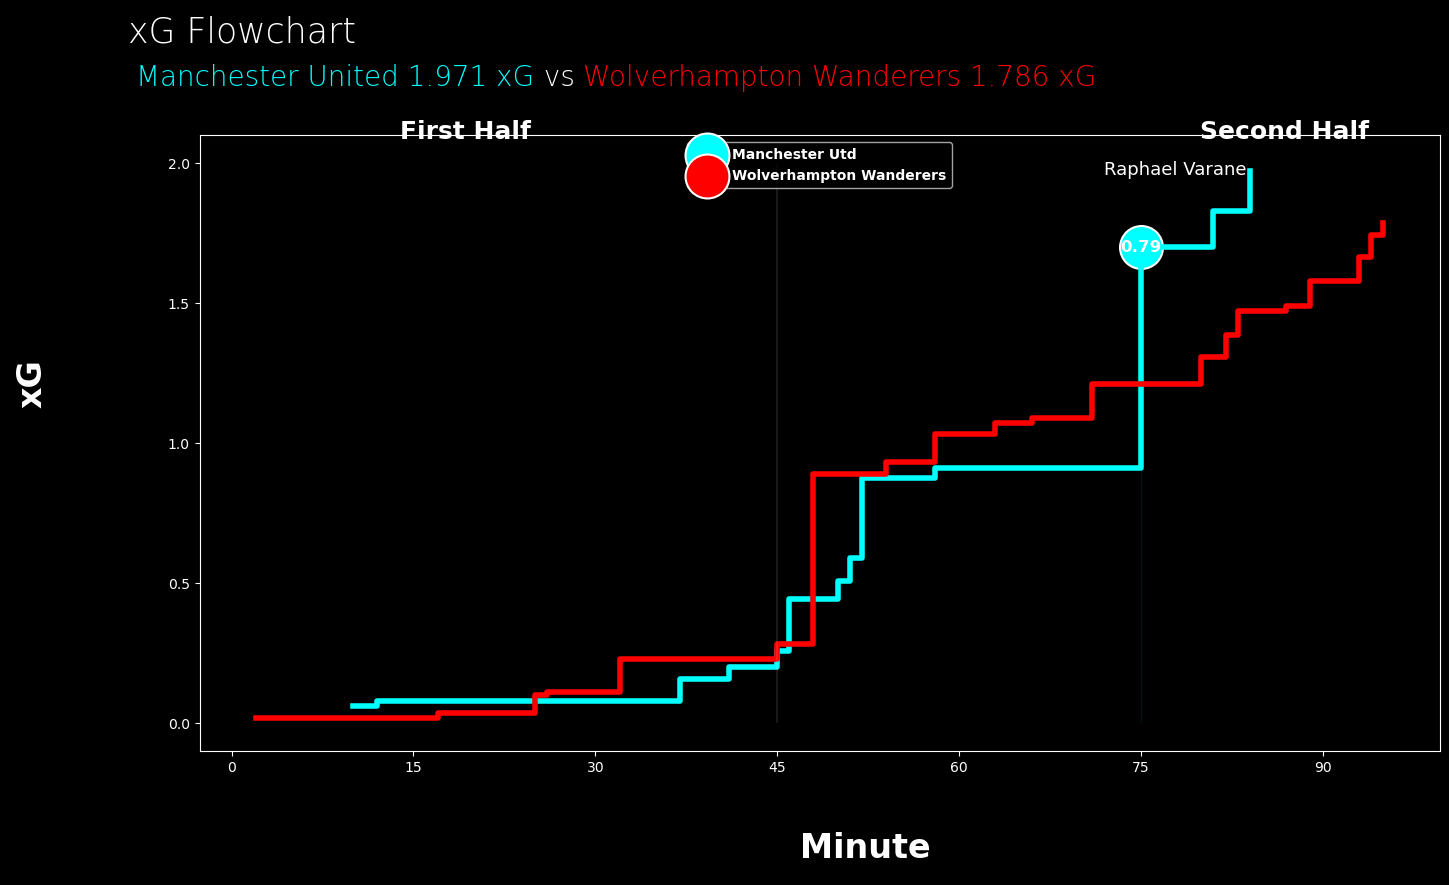

In [83]:
import matplotlib.pyplot as plt
from highlight_text import fig_text
# plot style 
#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
colour = 'white'
fig,ax = plt.subplots(figsize = (16,8))

# Step plot for Inter and Udinese 
ax.step(x = df_home['minute'] ,y = df_home['xGcum'] , where = 'post', color = 'cyan' ,linewidth = 4.0)
ax.step(x = df_away['minute'] ,y = df_away['xGcum'] , where = 'post', color = 'red' ,linewidth = 4.0)

#sns.scatterplot(x=x,y=y,s=430,marker='o',color='yellow')
ax.scatter(x=x,y=y, color='cyan', edgecolor=colour,s=955, label="Manchester Utd",linewidths=1.5,)
ax.scatter(x=x1,y=y1, color='red', edgecolor=colour,s=955, label="Wolverhampton Wanderers",linewidths=1.5)

#FILL AREA BETWEEN LINE AND X 
plt.fill_between(x,y, alpha=0.08, color='cyan')
plt.fill_between(x1,y1, alpha=0.08, color='red')

# Text annotation for goals
for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i]- 3, y1[i] + 0.26),c=colour,size=13)
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i]- 3, y[i] + 0.26),c=colour,size=13)

# legend
legend = ax.legend(loc="upper center",prop={'weight':'bold'})
legend.legendHandles[0]._sizes = [1000]
legend.legendHandles[1]._sizes = [1000]

# title
fig_text(0.08,1.03, s="xG Flowchart\n", fontsize = 25, fontweight = "light")
fig_text(0.08,0.97, s=" <{} {} xG> vs <{} {} xG>".format(team_home,xGcum_home,team_away,xGcum_away),highlight_textprops=[{"color":'cyan'}, {'color':"red"}], fontsize = 20, fontweight="light")

# text
fig_text(0.5,0.01, s="Minute\n", fontsize = 24, fontweight = "bold", color = colour)
fig_text(0.01,0.6, s="xG\n", fontsize = 24, fontweight = "bold", color = colour,rotation=90)
fig_text(0.25,0.9, s="First Half\n", fontsize = 18, fontweight = "bold", color = colour)
fig_text(0.75,0.9, s="Second Half\n", fontsize = 18, fontweight = "bold", color = colour)

# Finally a dotted line to separate the HT 
plt.vlines( ymin=0, ymax=2,x=45, color=colour, alpha=0.1,linestyle="solid")
# ticks
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0,0.5,1,1.5,2])

# Annotate quality chances inside the scatterplots

# Home team
for i in range(len(x)):
    plt.annotate(y_plot[i], (x[i], y[i]),c=colour,size=12,ha='center',va='center',fontweight='bold')
# Away team
for i in range(len(x1)):
    plt.annotate(y1_plot[i], (x1[i], y1[i]),c=colour,size=12,ha='center',va='center',fontweight='bold')

In [84]:
soup.find_all('div',{'class':"timiline-container"})

[<div class="timiline-container">
 <div class="timeline-left">
 <div class="timeline-block block-home">
 <div class="timeline-row">
 <a class="player-name" href="https://understat.com/player/10802">Lisandro Martínez</a> <i aria-hidden="true" class="fas fa-square yellow-card" title="Yellow card"></i>
 </div>
 </div>
 </div>
 <div class="timeline-minute">
 <span class="minute-value">16'</span>
 </div>
 <div class="timeline-right">
 <div class="timeline-block block-away">
 </div>
 </div>
 </div>,
 <div class="timiline-container">
 <div class="timeline-left">
 <div class="timeline-block block-home">
 </div>
 </div>
 <div class="timeline-minute">
 <span class="minute-value">26'</span>
 </div>
 <div class="timeline-right">
 <div class="timeline-block block-away">
 <div class="timeline-row">
 <i aria-hidden="true" class="fas fa-square yellow-card" title="Yellow card"></i> <a class="player-name" href="https://understat.com/player/1299">Mario Lemina</a>
 </div>
 </div>
 </div>
 </div>,
 <div cl

In [85]:
timeline = soup.find_all('div',{'class':"timiline-container"})

In [1]:
timeline[0]

NameError: name 'timeline' is not defined

In [92]:
timeline[1]

<div class="timiline-container">
<div class="timeline-left">
<div class="timeline-block block-home">
</div>
</div>
<div class="timeline-minute">
<span class="minute-value">26'</span>
</div>
<div class="timeline-right">
<div class="timeline-block block-away">
<div class="timeline-row">
<i aria-hidden="true" class="fas fa-square yellow-card" title="Yellow card"></i> <a class="player-name" href="https://understat.com/player/1299">Mario Lemina</a>
</div>
</div>
</div>
</div>